## Class 2 - Defining evaluation metrics and fitting basic regression models
In our second lecture, we discussed a number of algorithms and evaluation metrics for regression problems. Today, we will go back to the datasets we looked at last week, and implement some of these algorithms and evaluation metrics on the predictive modeling problems we have defined. 

We will do all of this using `scikit-learn`. A couple of useful pointers to useful documentation, before we start:
- In general, the scikit-learn documentation is your friend: https://scikit-learn.org/stable/
- Here is a list of linear models implemented as Extractors/Predictors in sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
- Here are different forms of neighbor-based models (we talked about `KNNRegressor` yesterday)
- Here are evaluation metrics implemented in sklearn: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics 
- Here are utilities for preprocessing steps: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing 

**Note**: Under `nbs/class_02` you will find a notebook called `example.ipynb`, where I provide an example of how to run today's exercise on simulated data.

### Today's exercise
Gather in the same or similar groups as last week. Under `class/class_02.md` you will find two predictive modeling questions, one for each datasets. There are different variants of the same questions, which differ in which outcome you want to predict.

What I would like you to do today is the following:
1. Create a folder called `group-x` within `nbs/class_02`, `cd` into it and work within that today
2. Choose an outcome variable for a regression problem. On the basis of this, define **which of the evaluation metrics** could be suitable. Evaluation metrics can be computed using scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 
3. (a) If you are in the bike sharing group, split your dataset into a training/validation/test set using later time points as validation/test set. Validation and test set should be 15% of your data each. (b) If you are in the personality group, using sklearn's `train_test_split` function, create a 70/15/15 random split of your data.
    - Remember to set a seed (`random_state`) when you do so. Let's all use the same (the classic `random_state=42`)
    - Save these datasets as separate csv files in a subfolder called `data`
4. Look at your outcome and predictors: do you want to transform them in any way?
5. Estimate the performance of a dummy baseline (i.e., the mean model) on all splits
6. Now look at your predictors: do they need any preprocessing? Any transformations? Removal of "bad" data points?
7. Fit the other models using KKN (sklearn's `KNeighborsRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) and linear models (`LinearRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Save the fitted model object (with a meaningful name) using `pickle` (https://scikit-learn.org/stable/model_persistence.html) in a subfolder called `model`.
8. Once you are done, evaluate all models on both the training and the validation set and visualize the scores


### Once you have done this
Please submit a pull request to my repository where, within `nbs/class_02/group-x` you have: 
- the notebook on which you have worked
- a subfolder called `data` containing your splits
- a subfolder called `models` containing your models

In next week's class, I will ask each group to briefly present their results.

In [4]:
# Loading data
import os 
import pandas as pd

path = os.path.join('..','..', '..', '_data', 'bike_sharing_dataset', 'day.csv')

bike_sharing = pd.read_csv(path)

## exploring data

In [10]:
bike_sharing.describe()
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


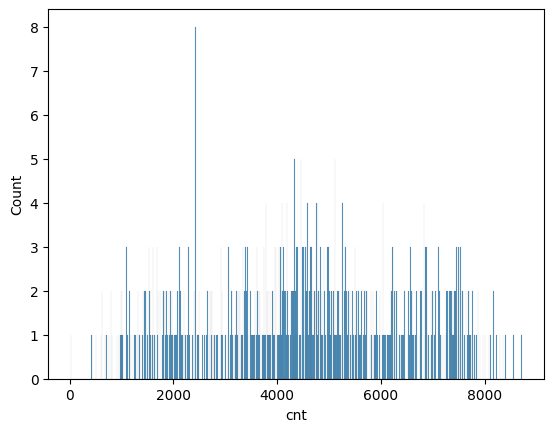

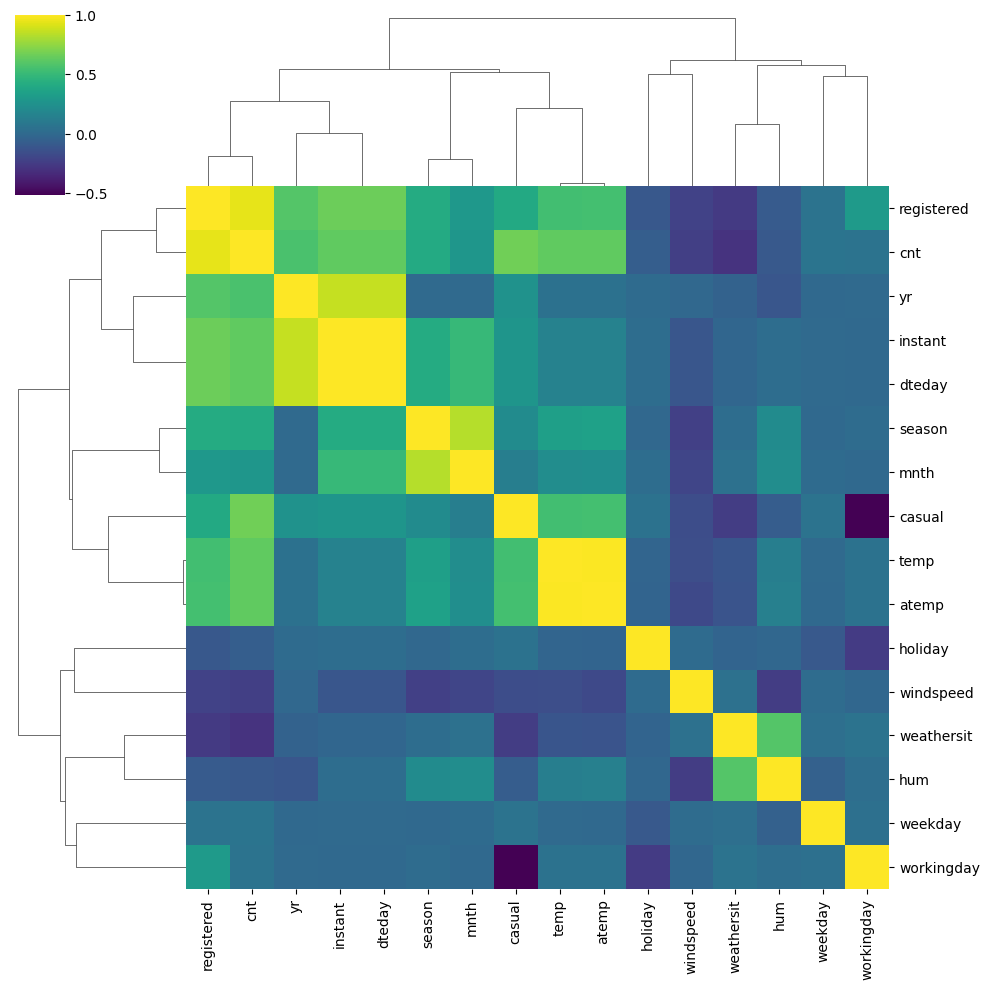

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=bike_sharing, x='cnt', binwidth=10)
plt.show()

# converting the date column to datetime
bike_sharing["dteday"] = pd.to_datetime(bike_sharing["dteday"])

sns.clustermap(bike_sharing.corr(), cmap='viridis')
plt.show()

## doing regression

Splitting the data and saving it in data folder

In [15]:
# Splitting the data
from sklearn.model_selection import train_test_split

# We start by selecting the features (X) and the target variable (y)
X = bike_sharing.drop(columns=['cnt', 'dteday']) # dropping the target variable and the date column, but keeping the index
y = bike_sharing['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#further splitting the training data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=X_test.shape[0] / X_train.shape[0], random_state=42) # test size is the proportion of the validation set to the training set (33%)

# saving the splits in data folder
path = os.path.join('data')

datasets = {'X_train': X_train, 'X_val': X_val, 'X_test': X_test, 'y_train': y_train, 'y_val': y_val, 'y_test': y_test}

for name, data in datasets.items():
    data.to_csv(os.path.join(path, f'{name}.csv'))

Building models

* Model 0: Predicting cnt based on temp, windspeed, weathersit

In [22]:
performance_metrics = []

# Training a model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train[['temp', 'hum', 'windspeed']], y_train)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_val[['temp', 'hum', 'windspeed']])
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

performance_metrics.append({'model': 'linear_regression', 'mse': mse, 'r2': r2}) 
    # r2 is the coefficient of determination which measures the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model
    # mse is the average of the squares of the errors which is the average squared difference between the estimated values and the actual value

# print performance metrics
print(performance_metrics)

# saving the model
import joblib

path = os.path.join('models')

joblib.dump(model, os.path.join(path, 'linear_model.pkl'))

[{'model': 'linear_regression', 'mse': 1961230.207530808, 'r2': 0.402929109455604}]


['models/linear_model.pkl']